In [1]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# cv2.cvtColor is an OpenCV function to convert images to different color spaces
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
 #just making a copy of image passed, so that passed image is not changed 
 img_copy = colored_img.copy()          
 
 #convert the test image to gray image as opencv face detector expects gray images
 gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
 
 #let's detect multiscale (some images may be closer to camera than others) images
 faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);          
 
 #go over list of faces and draw them as rectangles on original colored img
 for (x, y, w, h) in faces:
      cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              
 
 return img_copy

# 作業: 
1. 使用faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5); 
修改 scaleFactor, minNeighbor兩個參數計算 test5.jpg 有幾張臉

2. load cascade classifier training file for haarcascade 
3. load cascade classifier training file for lbpcascade 


In [4]:
def detect_faces(f_cascade, colored_img, scaleFactor=1.1, minNeighbors=5):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()          

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          

    #let's detect multiscale (some images may be closer to camera than others) images
    # scaleFactor – Parameter specifying how much the image size is reduced at each image scale.
    # minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain it.
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors);          

    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return len(faces), img_copy

In [5]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

test5 = cv2.imread('data/test5.jpg')

for i in [1.2, 1.3]:  #range(1,11)
    for j in [1, 3, 5]:
        n_Faces, faces_detected_img = detect_faces(haar_face_cascade, test5, scaleFactor=i, minNeighbors=j)
        print(f"scaleFactor={i}, minNeighbors = {j}, n_Faces = {n_Faces}")

scaleFactor=1.2, minNeighbors = 1, n_Faces = 6
scaleFactor=1.2, minNeighbors = 3, n_Faces = 5
scaleFactor=1.2, minNeighbors = 5, n_Faces = 3
scaleFactor=1.3, minNeighbors = 1, n_Faces = 7
scaleFactor=1.3, minNeighbors = 3, n_Faces = 3
scaleFactor=1.3, minNeighbors = 5, n_Faces = 3


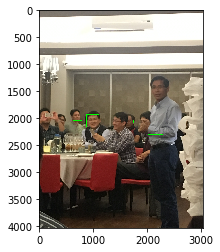

In [6]:
n_Faces, faces_detected_img = detect_faces(haar_face_cascade, test5, scaleFactor=1.3, minNeighbors=1)
plt.imshow(convertToRGB(faces_detected_img))

In [7]:

#load cascade classifier training file for lbpcascade 
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')

test5 = cv2.imread('data/test5.jpg')
for i in [1.2, 1.3]:
    for j in [1, 3, 5]:
        n_Faces, faces_detected_img = detect_faces(haar_face_cascade, test5, scaleFactor=i, minNeighbors=j)
        print(f"scaleFactor={i}, minNeighbors = {j}, n_Faces = {n_Faces}")

scaleFactor=1.2, minNeighbors = 1, n_Faces = 6
scaleFactor=1.2, minNeighbors = 3, n_Faces = 5
scaleFactor=1.2, minNeighbors = 5, n_Faces = 3
scaleFactor=1.3, minNeighbors = 1, n_Faces = 7
scaleFactor=1.3, minNeighbors = 3, n_Faces = 3
scaleFactor=1.3, minNeighbors = 5, n_Faces = 3


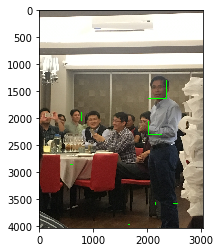

In [8]:
n_Faces, faces_detected_img = detect_faces(lbp_face_cascade, test5, scaleFactor = 1.3, minNeighbors=1)
plt.imshow(convertToRGB(faces_detected_img))

用haar訓練的模型效果比 lbp 要好